<a href="https://colab.research.google.com/github/nagendrap418/data-mining/blob/main/crime(cluster).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings 
warnings.filterwarnings('ignore')

In [74]:
!pip3 install KMeans

  Created wheel for KMeans: filename=kmeans-1.0.2-cp37-cp37m-linux_x86_64.whl size=11798 sha256=e4e6f6e234a8010b13967df10178d01fd6aa74c6a5accf4b03e3ddf5c7c01882
  Stored in directory: /root/.cache/pip/wheels/4a/26/51/688c6987fdc6a10c6186c3817f2ef7c92c50c078a900525c0e
Successfully built KMeans


In [38]:
data=pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [40]:
crime=data.drop("Unnamed: 0",axis=1)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


Normalization

In [44]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [46]:
df_norm = norm_func(crime.iloc[:,:])
df_norm 

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


#KMEANS Clustering

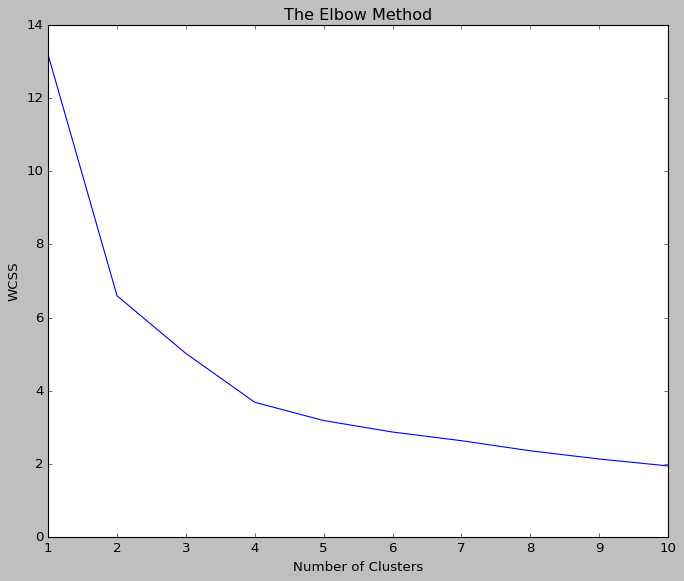

In [47]:
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [48]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_norm)  

In [49]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([0, 4, 4, 1, 4, 4, 3, 1, 4, 0, 3, 2, 4, 1, 2, 1, 1, 0, 2, 4, 3, 4,
       2, 0, 1, 1, 1, 4, 2, 3, 4, 4, 0, 2, 3, 1, 1, 3, 3, 0, 2, 0, 4, 3,
       2, 1, 3, 2, 2, 1], dtype=int32)

In [50]:
y_kmeans 

array([0, 4, 4, 1, 4, 4, 3, 1, 4, 0, 3, 2, 4, 1, 2, 1, 1, 0, 2, 4, 3, 4,
       2, 0, 1, 1, 1, 4, 2, 3, 4, 4, 0, 2, 3, 1, 1, 3, 3, 0, 2, 0, 4, 3,
       2, 1, 3, 2, 2, 1], dtype=int32)

In [51]:
clf.cluster_centers_ 

array([[0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.37198795, 0.35416667, 0.51412429, 0.32235142],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.25033467, 0.27549467, 0.81544256, 0.27103072],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189]])

In [52]:
clf.inertia_

3.183157731676654

In [53]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
crime

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,4
5,7.9,204,78,38.7,4
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,4
9,17.4,211,60,25.8,0


In [68]:
crime.groupby(crime.clust).mean() 

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,14.671429,251.285714,54.285714,21.685714
1,6.975000,148.416667,62.333333,19.775000
2,2.680000,70.100000,51.000000,10.910000
3,4.955556,125.444444,80.111111,17.788889
4,10.966667,264.000000,76.500000,33.608333


In [69]:
WCSS

[13.184122550256445,
 6.596893867946198,
 5.0184999914891115,
 3.6834561535859143,
 3.184261813967723,
 2.8700006834386063,
 2.6334934145588607,
 2.356439408570536,
 2.132841000643935,
 1.9433393930699396]

KMeans visualization

In [87]:
#plot.scatter(x=crime["clust"],y =data["Unnamed :0"],c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
#plt.title('Clusters using KMeans')   

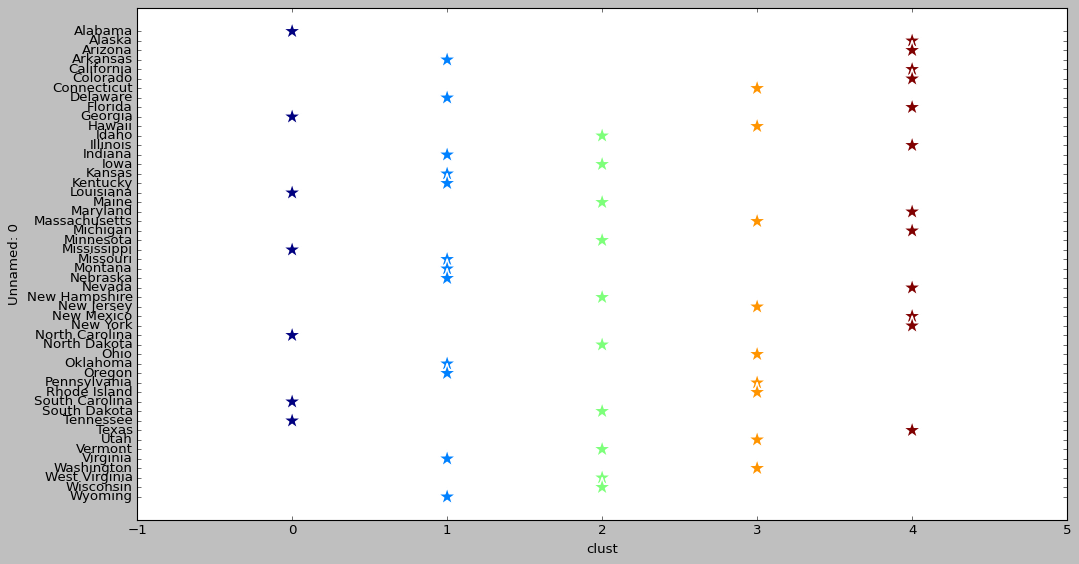

In [80]:
plt.figure(figsize=(15,8))
sn.scatterplot(crime['clust'],data['Unnamed: 0'],c=clf.labels_,s=300,marker='*')
plt.show();

# DBSCAN Clustering

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [97]:
crime

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,4
5,7.9,204,78,38.7,4
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,4
9,17.4,211,60,25.8,0


In [98]:
array=crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   0. ],
       [ 10. , 263. ,  48. ,  44.5,   4. ],
       [  8.1, 294. ,  80. ,  31. ,   4. ],
       [  8.8, 190. ,  50. ,  19.5,   1. ],
       [  9. , 276. ,  91. ,  40.6,   4. ],
       [  7.9, 204. ,  78. ,  38.7,   4. ],
       [  3.3, 110. ,  77. ,  11.1,   3. ],
       [  5.9, 238. ,  72. ,  15.8,   1. ],
       [ 15.4, 335. ,  80. ,  31.9,   4. ],
       [ 17.4, 211. ,  60. ,  25.8,   0. ],
       [  5.3,  46. ,  83. ,  20.2,   3. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ],
       [ 10.4, 249. ,  83. ,  24. ,   4. ],
       [  7.2, 113. ,  65. ,  21. ,   1. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ],
       [  6. , 115. ,  66. ,  18. ,   1. ],
       [  9.7, 109. ,  52. ,  16.3,   1. ],
       [ 15.4, 249. ,  66. ,  22.2,   0. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ],
       [ 11.3, 300. ,  67. ,  27.8,   4. ],
       [  4.4, 149. ,  85. ,  16.3,   3. ],
       [ 12.1, 255. ,  74. ,  35.1,   4. ],
       [  2.7,  72. ,  66. ,  14

In [99]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.54425112],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.34219957],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.34219957],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.82263845],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.34219957],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.34219957],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  0.6205869 ],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.82263845],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.34219957],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.54425112],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  0.6205869 ],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.10102577],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.34219957],
       [-0.13637203, -0.70012057, -0.0

In [125]:
dbscan = DBSCAN(eps=1.25, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1.25)

In [126]:
#Noisy samples are given the label -1.
dbscan.labels_          

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0, -1,  2,  2,  2,  2,  2,  2,  2])

In [127]:
c=pd.DataFrame(dbscan.labels_,columns=['cluster'])   

In [128]:
c
pd.set_option("display.max_rows", None)  

In [129]:
c

,cluster
0,0
1,-1
2,1
3,2
4,-1
5,1
6,2
7,2
8,-1
9,0


In [131]:
df = pd.concat([data,c],axis=1)  
df     

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


DBSCAN Visualization

Text(0.5, 1.0, 'Clusters using DBScan')

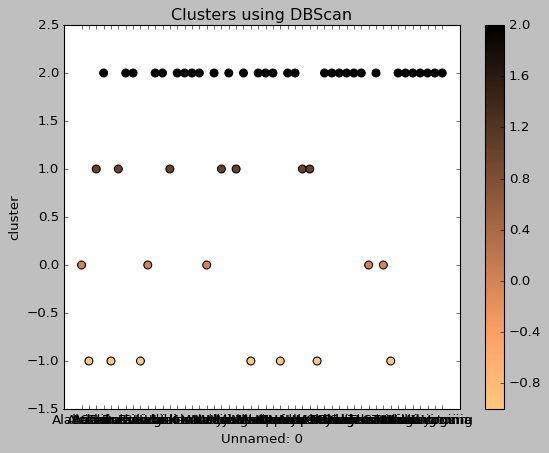

In [133]:
df.plot(x="Unnamed: 0",y ="cluster",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')      

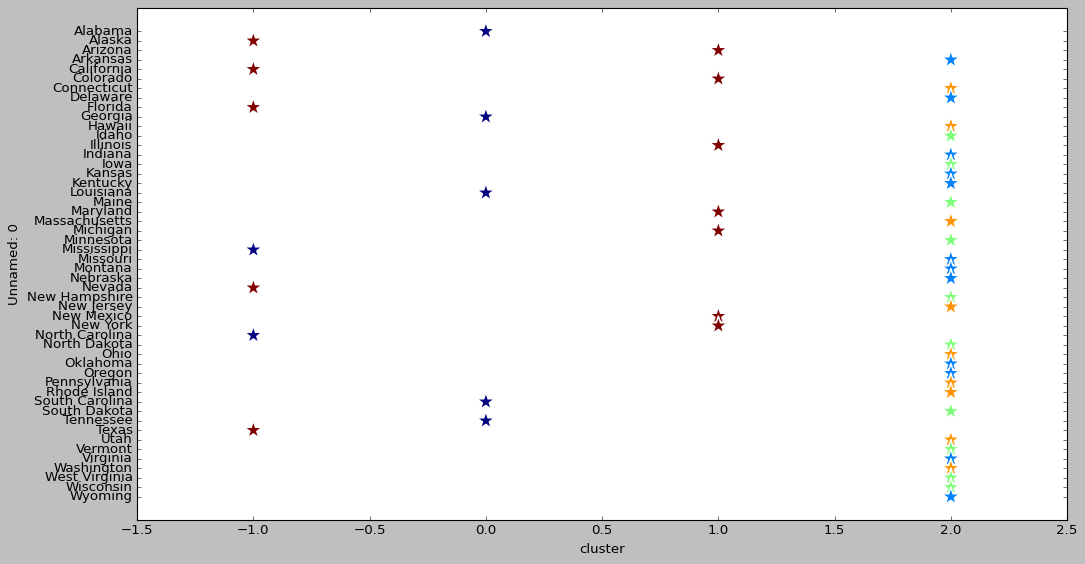

In [135]:
plt.figure(figsize=(15,8))
sn.scatterplot(df['cluster'],df['Unnamed: 0'],c=clf.labels_,s=300,marker='*')
plt.show();

#HIERARCHAICAL Clustering

In [136]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [145]:
crime

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,4
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,4
5,7.9,204,78,38.7,4
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,4
9,17.4,211,60,25.8,0


####Standard Scaler

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
crime_subset = pd.DataFrame(scaler.fit_transform(crime.iloc[:,1:7]))
crime_subset  

,0,1,2,3
0,0.790787,-0.526195,-0.003451,-1.544251
1,1.118060,-1.224067,2.509424,1.342200
2,1.493817,1.009122,1.053466,1.342200
3,0.233212,-1.084492,-0.186794,-0.822638
4,1.275635,1.776781,2.088814,1.342200
5,0.402909,0.869548,1.883901,1.342200
6,-0.736484,0.799761,-1.092723,0.620587
7,0.815030,0.450825,-0.585834,-0.822638
8,1.990786,1.009122,1.150530,1.342200
9,0.487757,-0.386621,0.492653,-1.544251


###Dendrogram

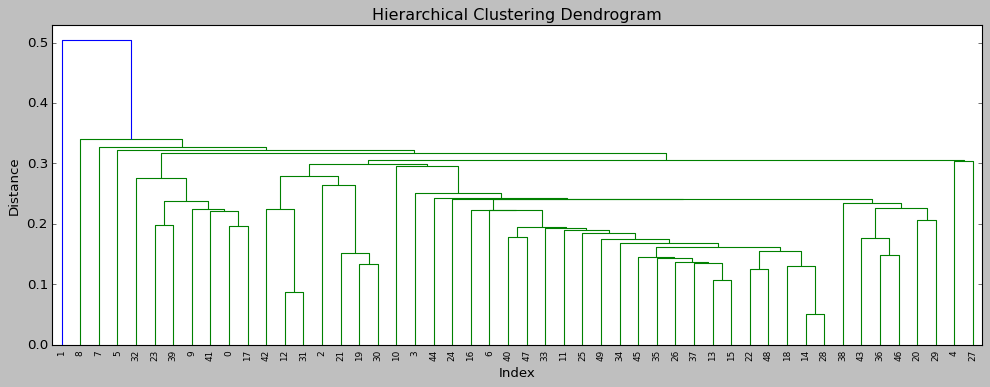

In [166]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()    

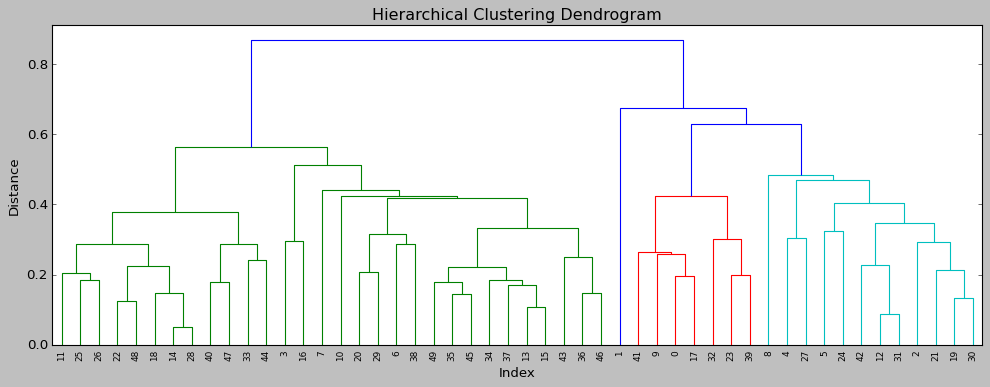

In [167]:
p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()    

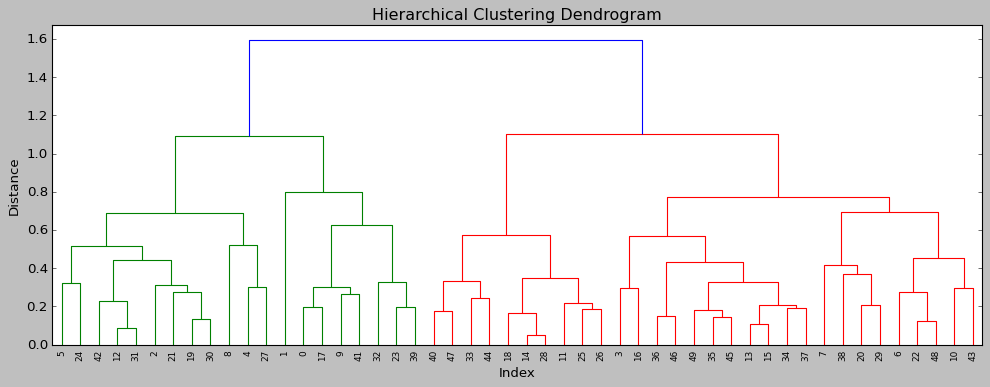

In [168]:
p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()    

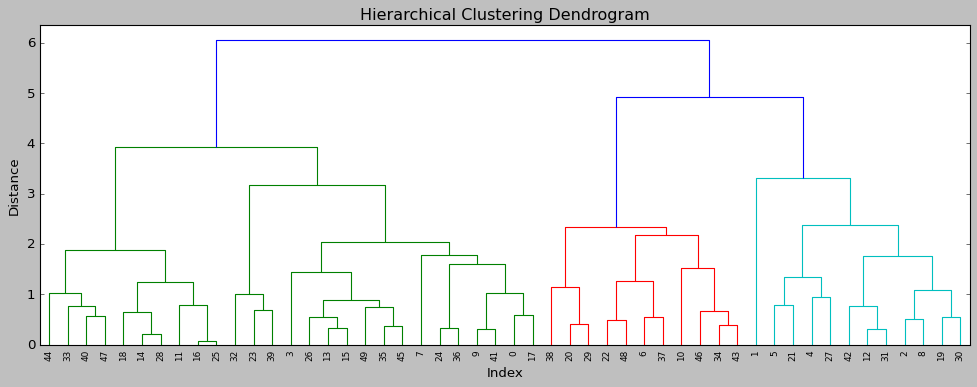

In [169]:
p = np.array(crime_subset) # converting into numpy array format 
z = linkage(crime_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [170]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
crime['clust']=cluster_labels # creating a  new column and assigning it to new column 
crime   

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [171]:
crime.iloc[:,1:].groupby(crime.clust).mean()

,Assault,UrbanPop,Rape,clust
clust,,,,
0,132.300000,70.800000,18.100000,0.0
1,256.916667,78.333333,32.250000,1.0
2,78.700000,49.300000,11.630000,2.0
3,251.285714,54.285714,21.685714,3.0
4,263.000000,48.000000,44.500000,4.0


In [172]:
data = crime[(crime.clust==0)]
data  

,Murder,Assault,UrbanPop,Rape,clust
3,8.8,190,50,19.5,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
10,5.3,46,83,20.2,0
13,7.2,113,65,21.0,0
15,6.0,115,66,18.0,0
16,9.7,109,52,16.3,0
20,4.4,149,85,16.3,0
22,2.7,72,66,14.9,0
29,7.4,159,89,18.8,0


In [173]:
data = crime[(crime.clust==1)]
data  

,Murder,Assault,UrbanPop,Rape,clust
2,8.1,294,80,31.0,1
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
8,15.4,335,80,31.9,1
12,10.4,249,83,24.0,1
19,11.3,300,67,27.8,1
21,12.1,255,74,35.1,1
24,9.0,178,70,28.2,1
27,12.2,252,81,46.0,1
30,11.4,285,70,32.1,1


In [174]:
data = crime[(crime.clust==2)]
data  

,Murder,Assault,UrbanPop,Rape,clust
11,2.6,120,54,14.2,2
14,2.2,56,57,11.3,2
18,2.1,83,51,7.8,2
25,6.0,109,53,16.4,2
26,4.3,102,62,16.5,2
28,2.1,57,56,9.5,2
33,0.8,45,44,7.3,2
40,3.8,86,45,12.8,2
44,2.2,48,32,11.2,2
47,5.7,81,39,9.3,2


In [175]:
data = crime[(crime.clust==3)]
data  

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,3
9,17.4,211,60,25.8,3
17,15.4,249,66,22.2,3
23,16.1,259,44,17.1,3
32,13.0,337,45,16.1,3
39,14.4,279,48,22.5,3
41,13.2,188,59,26.9,3


In [176]:
data = crime[(crime.clust==4)]
data  

,Murder,Assault,UrbanPop,Rape,clust
1,10.0,263,48,44.5,4


###Inference

In Hierarchical cluster, Complete method is suitable for clustering the crime data.   